In [1]:
import pandas as pd


In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

In [5]:
data = pd.read_csv("C:/Users/ORIGINAL/Downloads/archive/housing.csv")

In [6]:
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
from sklearn.model_selection import train_test_split
x= data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [11]:
x_train,x_test , y_train , y_test =train_test_split(x, y, test_size=0.2)

In [12]:
train_data = x_train.join(y_train)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

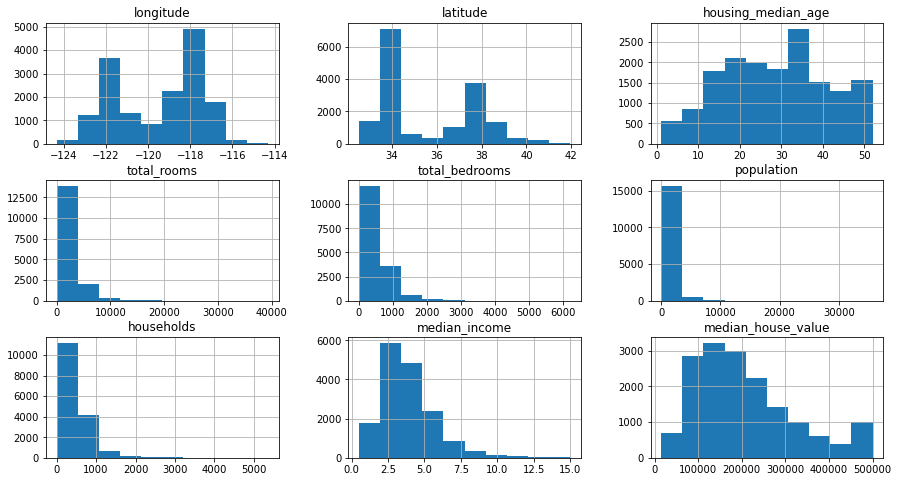

In [13]:
train_data.hist(figsize=(15,8))

<AxesSubplot:>

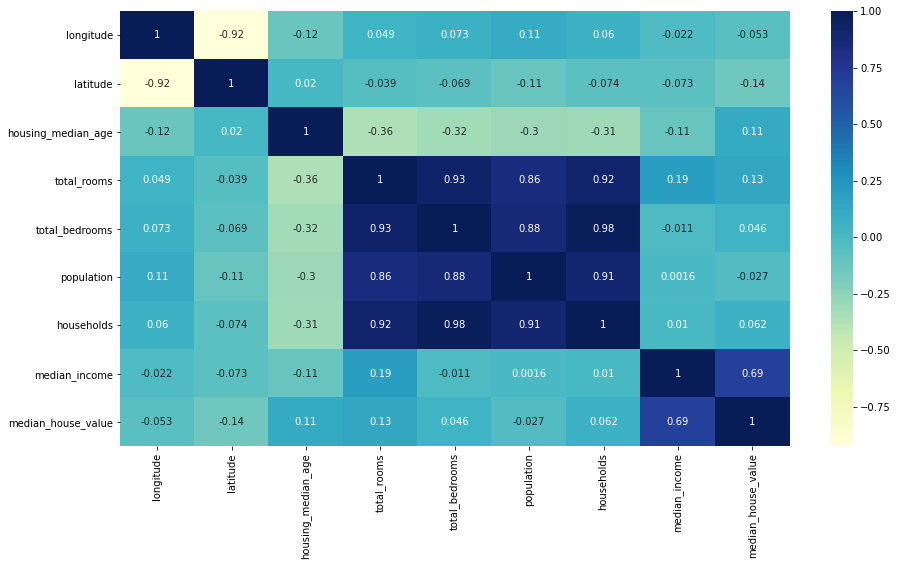

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot=True,cmap="YlGnBu")

In [15]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

In [16]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8991,-118.35,34.00,30.0,7.539027,5.424950,6.608001,5.587249,6.4310,492500.0,1,0,0,0,0
16533,-121.18,37.79,16.0,7.190676,5.659482,6.234411,5.697093,1.9464,112500.0,0,1,0,0,0
2105,-119.76,36.75,39.0,7.711549,6.335054,7.616776,6.198479,1.8641,50800.0,0,1,0,0,0
4234,-118.30,34.11,52.0,7.578145,5.505332,6.470800,5.472271,6.9391,500001.0,1,0,0,0,0
4042,-118.50,34.15,33.0,8.040769,5.961005,7.013915,5.932245,13.4196,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,-122.21,37.79,34.0,7.768533,6.324359,7.325149,6.248043,2.8365,139200.0,0,0,0,1,0
6137,-117.97,34.08,8.0,7.614805,6.175867,7.485492,6.104793,3.0806,142400.0,0,1,0,0,0
12323,-116.57,34.00,20.0,5.564520,4.219508,4.248495,3.931826,3.5208,76600.0,0,1,0,0,0
16071,-122.49,37.75,43.0,7.623153,5.976351,6.887553,5.937536,3.9205,319100.0,0,0,0,0,1


<AxesSubplot:>

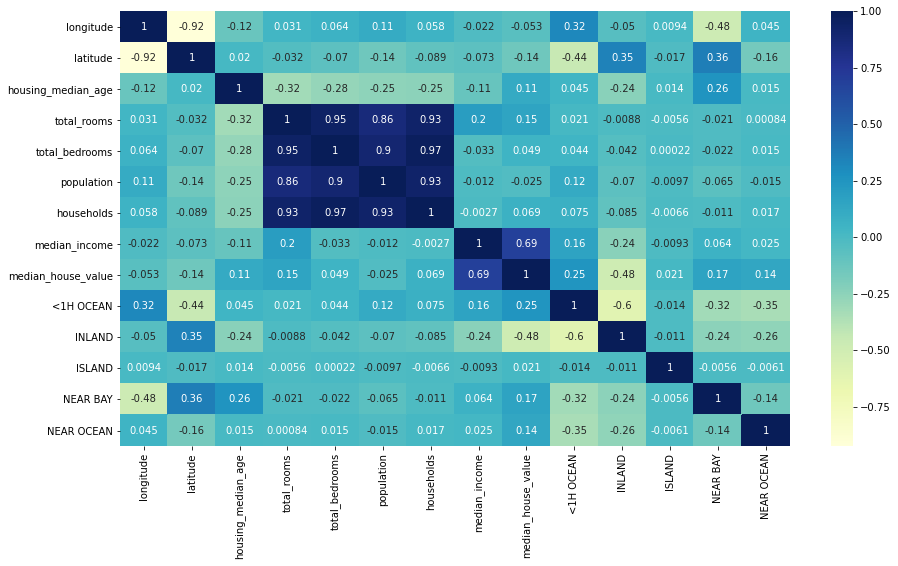

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

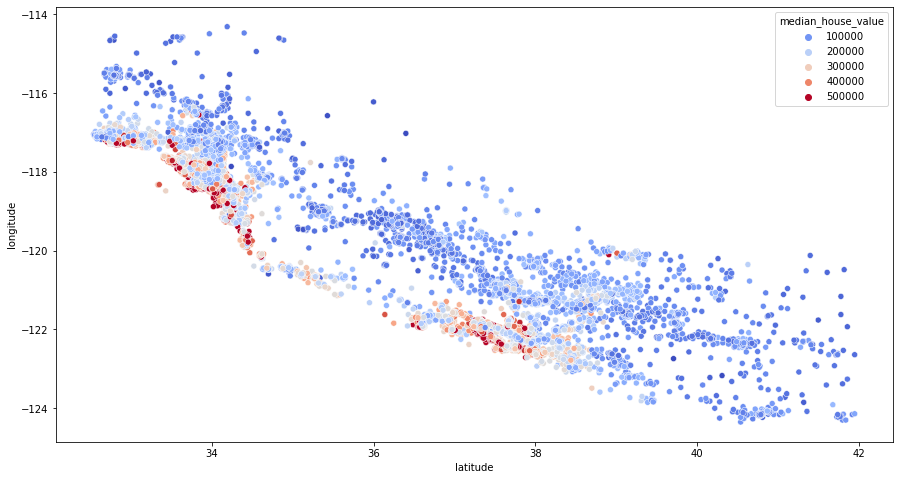

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude" , y="longitude",data=train_data, hue="median_house_value" ,palette="coolwarm")

In [20]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

In [21]:
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [22]:
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import StandardScaler

In [23]:
x_train ,y_train =train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']
scaler= StandardScaler()
x_train_s= scaler.fit_transform(x_train)
reg = LinearRegression() 
reg.fit(x_train_s,y_train)

LinearRegression()

In [24]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [25]:
x_test ,y_test =test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']


In [26]:
x_test_s = scaler.transform(x_test)

In [27]:
reg.score(x_test_s,y_test)

0.6800116043238653

In [28]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [29]:
forest.score(x_test_s,y_test)

0.8187837559562392

In [30]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

param_grid = {
    "n_estimators" :[100,200,300] ,
    "max_features" : [2, 4],
    "max_depth" : [None,4,8]
    
}

grid_search =GridSearchCV(forest ,param_grid ,cv=5,
                         scoring="neg_mean_squared_error" ,
                         return_train_score=True)
grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'max_features': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [31]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=300)

In [32]:
grid_search.best_estimator_.score(x_test_s,y_test)

0.8152454907142975